# SI 608 Final Project

In [2]:
DRIVE_PATH = 'drive/My Drive/Colab Notebooks/SI 608'

In [3]:
from google.colab import drive
drive.mount('/content/drive') # connect to Google Drive

Mounted at /content/drive


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
!pwd
os.chdir("/content/" + DRIVE_PATH)
!ls

/content
03_rq3.ipynb			 dolphins.gml	SI608_Group_Project.ipynb
608_Final_Project_Dolphin.ipynb  dolphins.json	VoterFraud2020-main


In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import random
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities
from networkx.readwrite import json_graph
from networkx.algorithms import clique

In [7]:
FILE_PATH = 'dolphins.gml'

# Loading the dolphin social network from the GML file
dolphin_network = nx.read_gml(FILE_PATH)

In [8]:
num_nodes = dolphin_network.number_of_nodes()
num_edges = dolphin_network.number_of_edges()
print(num_nodes, num_edges)

62 159


In [9]:
# Show the detail of the data
d = json_graph.node_link_data(dolphin_network)
# Pretty printing the result for better readability
print(json.dumps(d, indent=4))

{
    "directed": false,
    "multigraph": false,
    "graph": {},
    "nodes": [
        {
            "id": "Beak"
        },
        {
            "id": "Beescratch"
        },
        {
            "id": "Bumper"
        },
        {
            "id": "CCL"
        },
        {
            "id": "Cross"
        },
        {
            "id": "DN16"
        },
        {
            "id": "DN21"
        },
        {
            "id": "DN63"
        },
        {
            "id": "Double"
        },
        {
            "id": "Feather"
        },
        {
            "id": "Fish"
        },
        {
            "id": "Five"
        },
        {
            "id": "Fork"
        },
        {
            "id": "Gallatin"
        },
        {
            "id": "Grin"
        },
        {
            "id": "Haecksel"
        },
        {
            "id": "Hook"
        },
        {
            "id": "Jet"
        },
        {
            "id": "Jonah"
        },
        {
            "

Understanding the data format:




The nodes are labeled with the ID of the dolphin number and name. They start at 0.


The links contain the source (Dolphin number) and the target (Another dolphin number)


{'id': 55, 'label': 'Vau'},


Dolphin 'Vau' only has two encounters on the visualization,


https://raw.githubusercontent.com/jeremyshantz/dolphin-social-network/master/dolphin.png


'Haecksel' and 'Trigger'


{'source': 15, 'target': 55}, - Haecksel is ID 15


{'source': 51, 'target': 55}, - Trigger is ID 51


The encounters are not repeated more than one time.

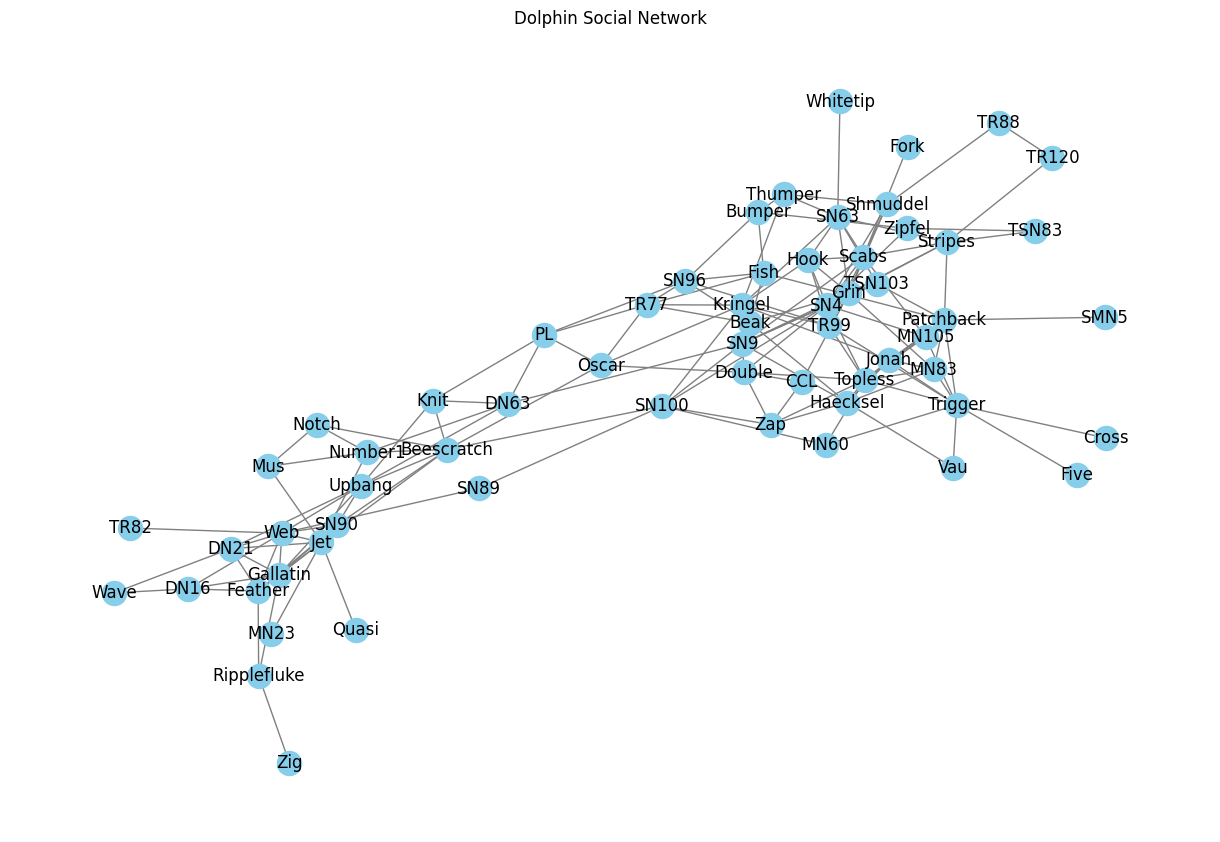

In [10]:
# Basic visualization of the dolphin social network
plt.figure(figsize=(12, 8))
nx.draw(dolphin_network, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Dolphin Social Network")
plt.show()

## Degree Distribution

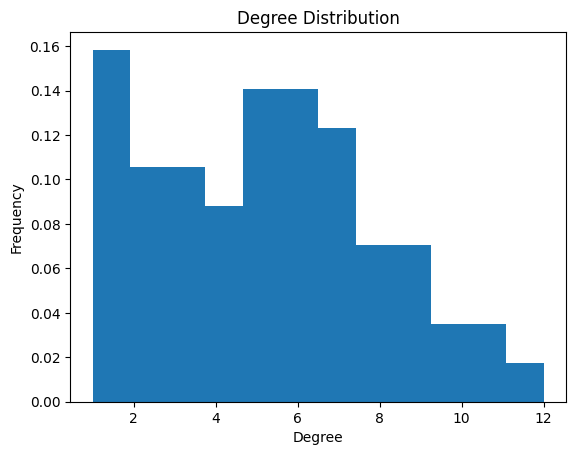

In [11]:
degrees = [degree for node, degree in dolphin_network.degree()]
degree_distribution = plt.hist(degrees, bins=max(degrees), density=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

## Basic Metrics: Centrality

Degree Centrality: Identifies the most connected dolphins.

In [12]:
degree_centrality = nx.degree_centrality(dolphin_network)
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [13]:
print(top_5_degree)

[('Grin', 0.19672131147540983), ('SN4', 0.18032786885245902), ('Topless', 0.18032786885245902), ('Scabs', 0.1639344262295082), ('Trigger', 0.1639344262295082)]


Closeness Centrality: Highlights dolphins that can efficiently interact with others in the network.

In [14]:
closeness_centrality = nx.closeness_centrality(dolphin_network)
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [15]:
print(top_5_closeness)

[('SN100', 0.4178082191780822), ('SN9', 0.40397350993377484), ('SN4', 0.39869281045751637), ('Kringel', 0.391025641025641), ('Grin', 0.3765432098765432)]


Betweenness Centrality: Shows dolphins that act as bridges within the network.

In [16]:
betweenness_centrality = nx.betweenness_centrality(dolphin_network)
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [17]:
print(top_5_betweenness)

[('SN100', 0.24823719602893804), ('Beescratch', 0.21332443553281097), ('SN9', 0.1431495183426175), ('SN4', 0.13856978865859435), ('DN63', 0.11823861926938342)]


Eigenvector Centrality: Reflects the influence of a dolphin based on the connections.

In [18]:
eigenvector_centrality = nx.eigenvector_centrality(dolphin_network)
top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [19]:
print(top_5_eigenvector)

[('Grin', 0.3157810764804676), ('SN4', 0.3005609284704956), ('Topless', 0.28500310473240437), ('Scabs', 0.281097017160587), ('TR99', 0.21769051331081507)]


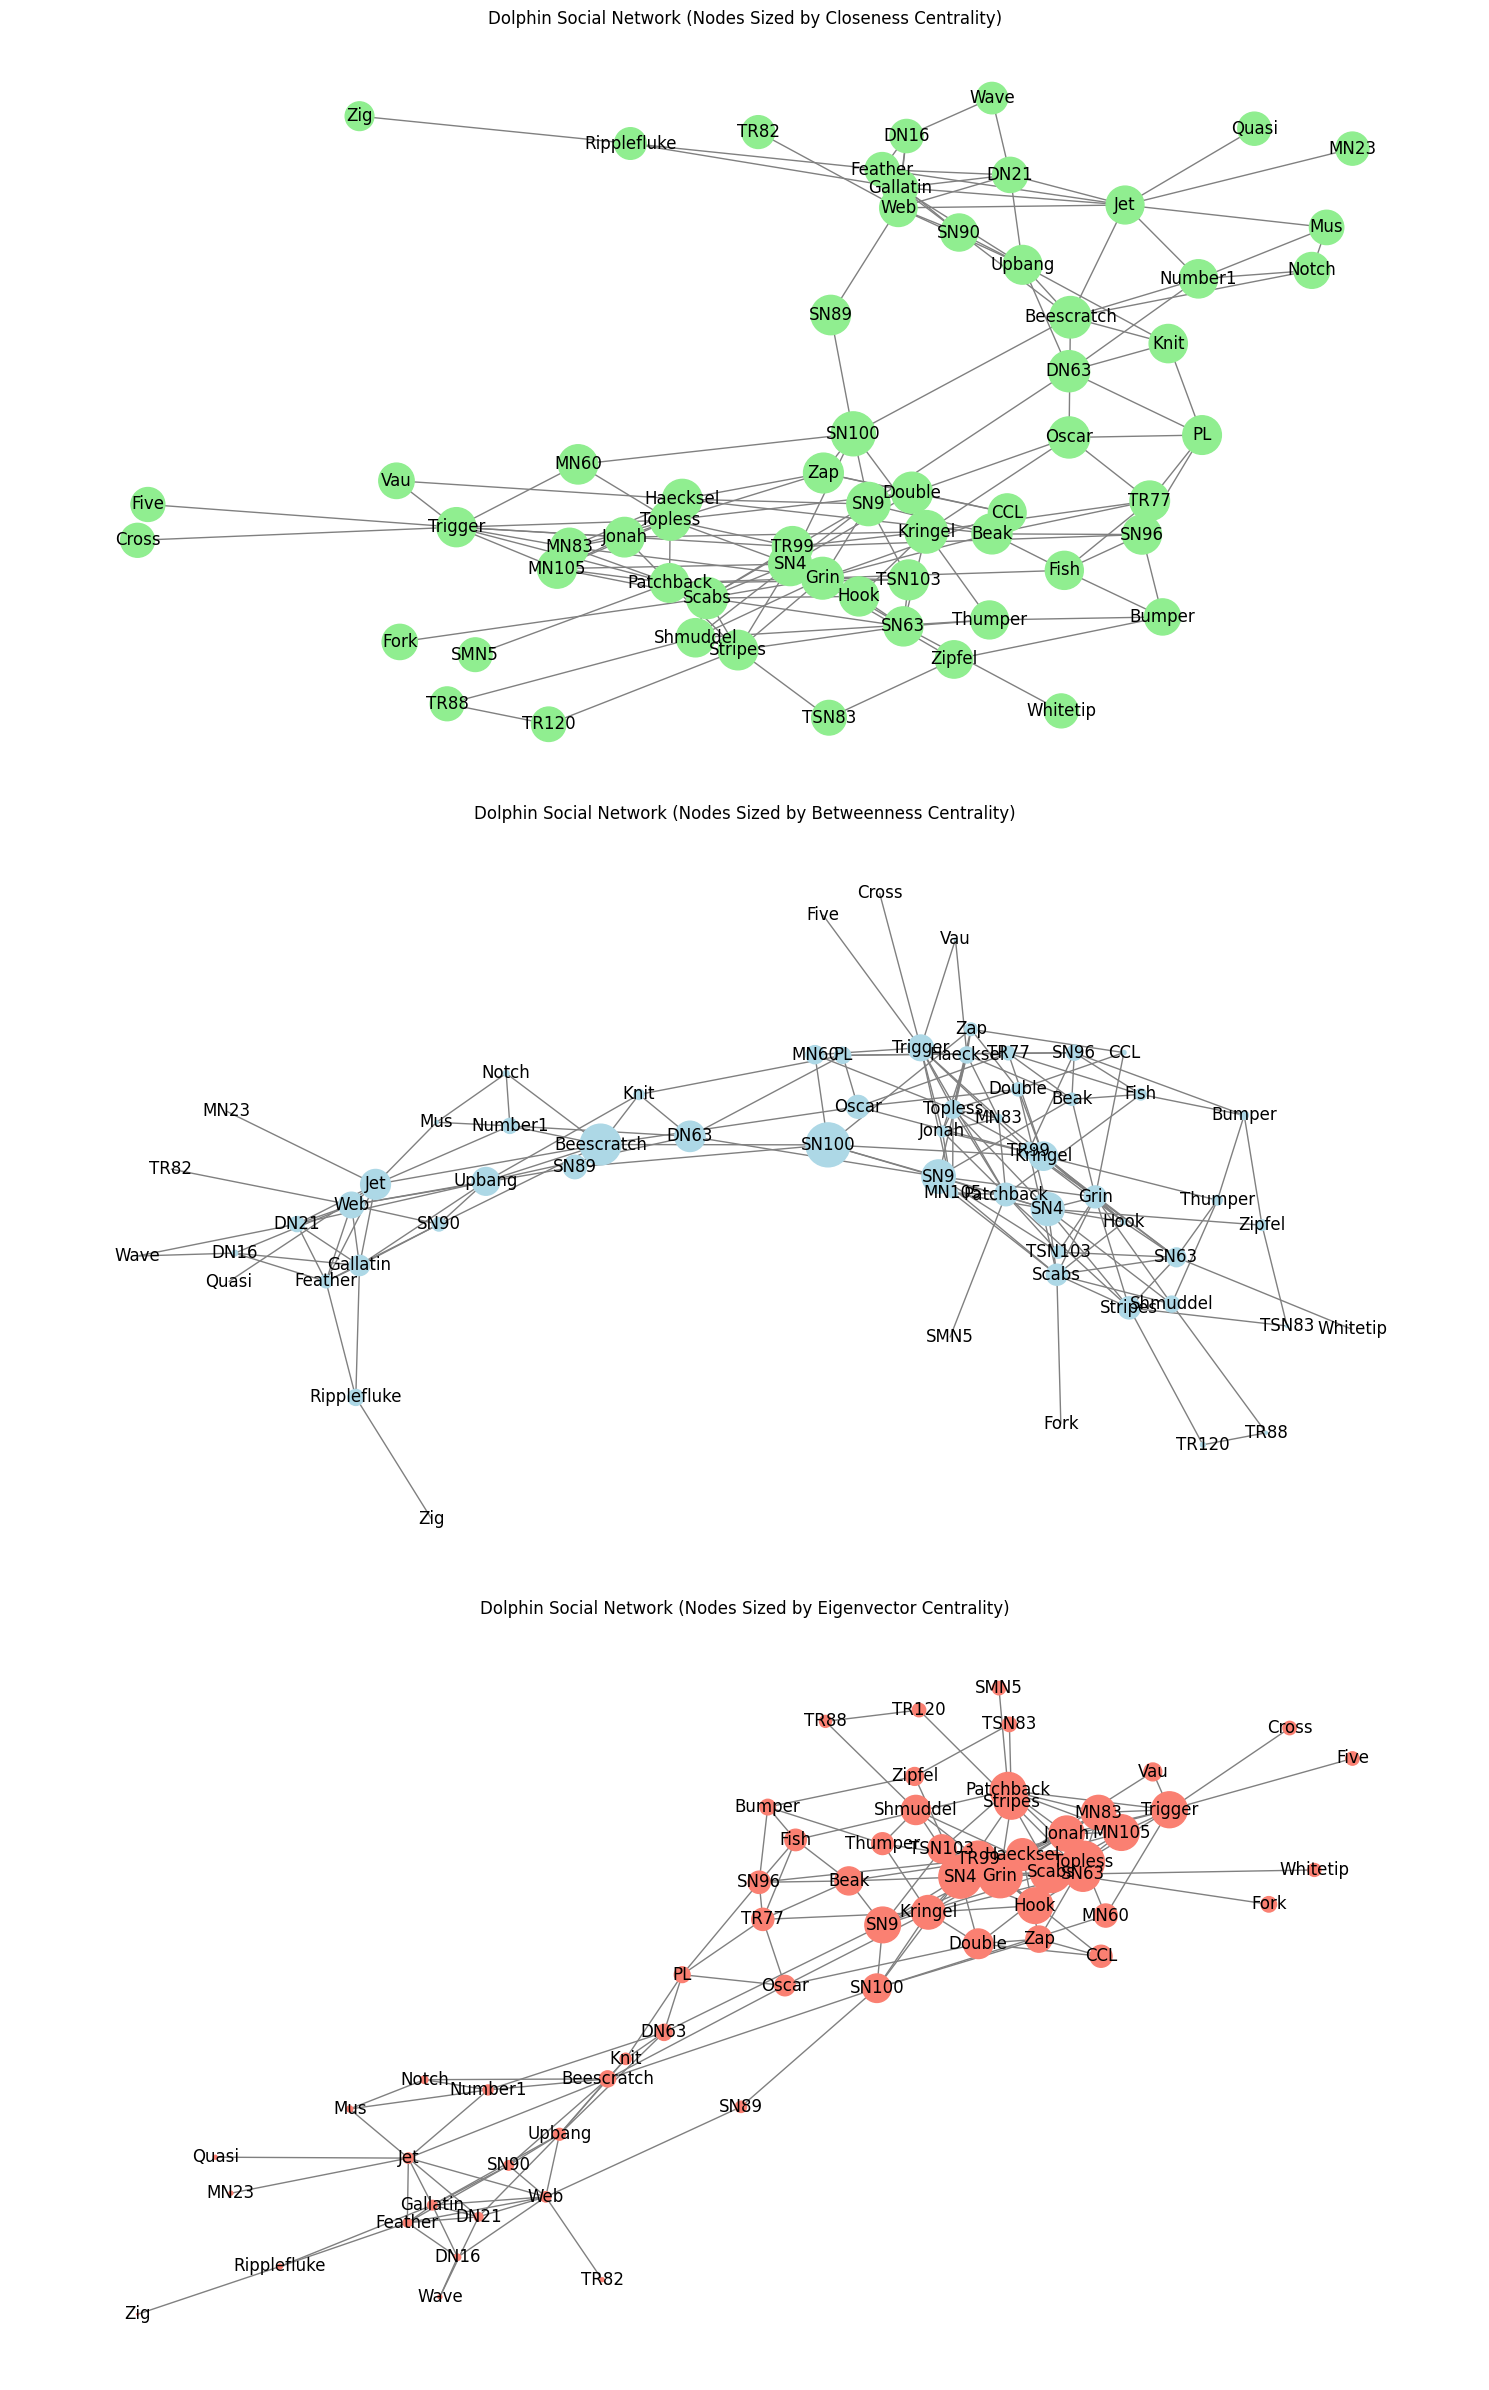

In [20]:
# Normalizing these centrality measures for visualization purposes
max_closeness_centrality = max(closeness_centrality.values())
max_betweenness_centrality = max(betweenness_centrality.values())
max_eigenvector_centrality = max(eigenvector_centrality.values())

normalized_closeness_centrality = {node: centrality / max_closeness_centrality * 1000 for node, centrality in closeness_centrality.items()}
normalized_betweenness_centrality = {node: centrality / max_betweenness_centrality * 1000 for node, centrality in betweenness_centrality.items()}
normalized_eigenvector_centrality = {node: centrality / max_eigenvector_centrality * 1000 for node, centrality in eigenvector_centrality.items()}

# Creating subplots for each centrality measure
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

# Closeness Centrality
nx.draw(dolphin_network,
        ax=axes[0],
        nodelist=closeness_centrality.keys(),
        node_size=[normalized_closeness_centrality[node] for node in dolphin_network.nodes()],
        node_color='lightgreen',
        edge_color='gray',
        with_labels=True)
axes[0].set_title("Dolphin Social Network (Nodes Sized by Closeness Centrality)")

# Betweenness Centrality
nx.draw(dolphin_network,
        ax=axes[1],
        nodelist=betweenness_centrality.keys(),
        node_size=[normalized_betweenness_centrality[node] for node in dolphin_network.nodes()],
        node_color='lightblue',
        edge_color='gray',
        with_labels=True)
axes[1].set_title("Dolphin Social Network (Nodes Sized by Betweenness Centrality)")

# Eigenvector Centrality
nx.draw(dolphin_network,
        ax=axes[2],
        nodelist=eigenvector_centrality.keys(),
        node_size=[normalized_eigenvector_centrality[node] for node in dolphin_network.nodes()],
        node_color='salmon',
        edge_color='gray',
        with_labels=True)
axes[2].set_title("Dolphin Social Network (Nodes Sized by Eigenvector Centrality)")

plt.tight_layout()
plt.show()


## What Role do Specific Dolphins Play in Bridging Communities? (Betweeness Centrality)

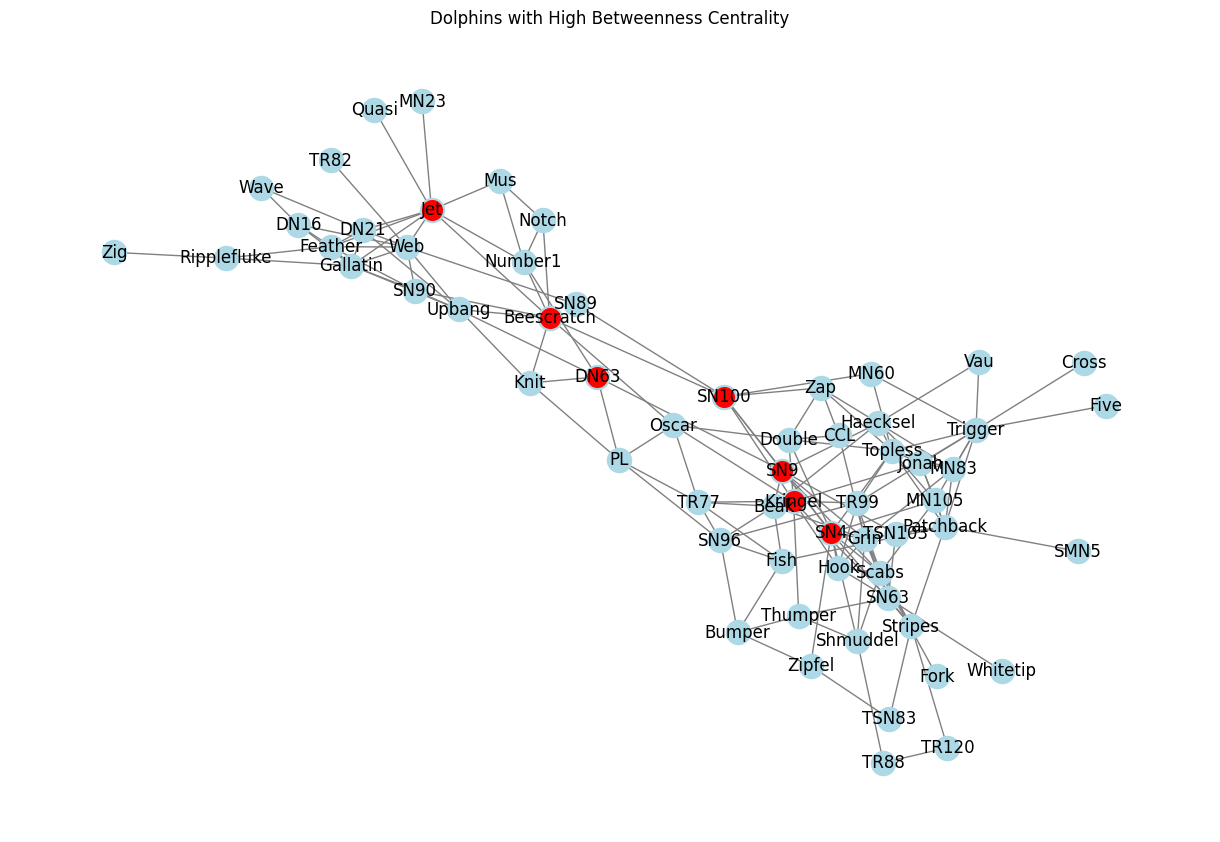

In [42]:
# Define a threshold for high betweenness centrality, e.g., top 10%
top_percentile = np.percentile(list(betweenness_centrality.values()), 90)
high_betweenness_dolphins = [node for node, centrality in betweenness_centrality.items() if centrality >= top_percentile]

# Generate positions for the network visualization
pos = nx.spring_layout(dolphin_network)

# Visualization
plt.figure(figsize=(12, 8))
nx.draw(dolphin_network, pos, node_color='lightblue', edge_color='gray', with_labels=True)
nx.draw_networkx_nodes(dolphin_network, pos, nodelist=high_betweenness_dolphins, node_color='red', node_size=200)
plt.title("Dolphins with High Betweenness Centrality")
plt.show()

# Community Detection

Closeness Centrality (Top Visualization): Nodes are sized based on how close they are to all other nodes in the network. Larger nodes represent dolphins that can quickly interact with others in the network.

Betweenness Centrality (Middle Visualization): Nodes are sized based on the number of shortest paths that pass through them. Larger nodes indicate dolphins that act as bridges between different parts of the network.

Eigenvector Centrality (Bottom Visualization): Nodes are sized based on the centrality of their neighbors. Larger nodes represent dolphins that are connected to other highly connected dolphins, indicating influential individuals in the network.

In [21]:
# Using the Greedy Modularity method for community detection
communities = list(greedy_modularity_communities(dolphin_network))

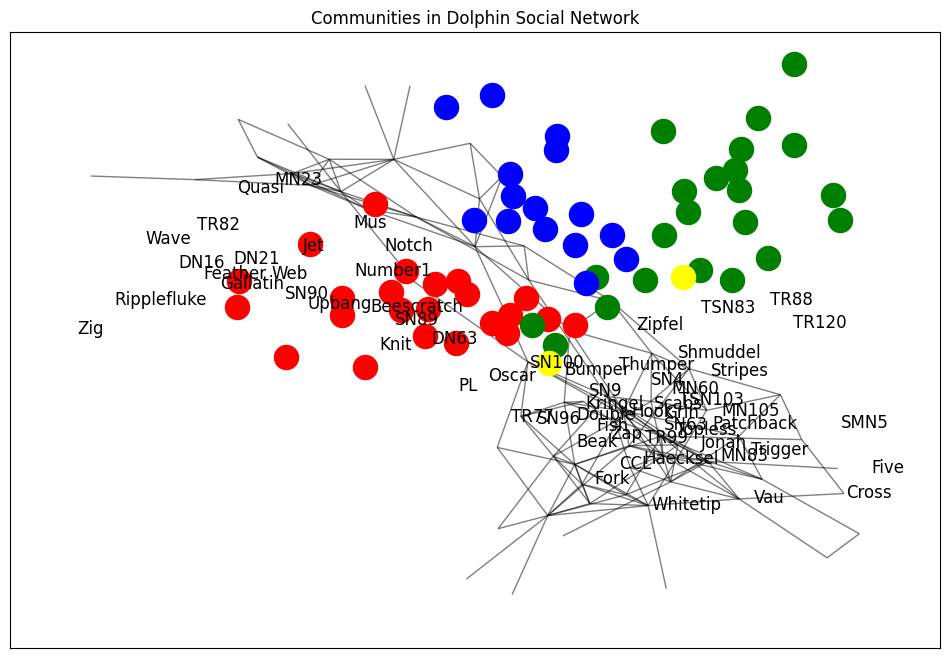

In [22]:
# Visualizing the communities
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'yellow', 'purple']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(dolphin_network, pos=nx.spring_layout(dolphin_network),
                           nodelist=list(community), node_color=colors[i % len(colors)])
nx.draw_networkx_edges(dolphin_network, pos=nx.spring_layout(dolphin_network), alpha=0.5)
nx.draw_networkx_labels(dolphin_network, pos=nx.spring_layout(dolphin_network))
plt.title("Communities in Dolphin Social Network")
plt.show()

In [23]:
# Number of communities and some example nodes from each community
num_communities = len(communities)
community_examples = {f"Community {i+1}": list(community)[:3] for i, community in enumerate(communities)}
num_communities, community_examples

(4,
 {'Community 1': ['Kringel', 'Fish', 'SN4'],
  'Community 2': ['MN23', 'DN63', 'Knit'],
  'Community 3': ['Jonah', 'Haecksel', 'Double'],
  'Community 4': ['SN100', 'SN89']})

### Most Influential Dolphins in Each Community

In [36]:
def most_influential_in_community(G, community):
    subgraph = G.subgraph(community)
    degree_centrality = nx.degree_centrality(subgraph)
    most_influential = max(degree_centrality, key=degree_centrality.get)
    return most_influential

most_influential_dolphins = {f"Community {i+1}": most_influential_in_community(dolphin_network, community)
                             for i, community in enumerate(communities)}

most_influential_dolphins

{'Community 1': 'Grin',
 'Community 2': 'Jet',
 'Community 3': 'Trigger',
 'Community 4': 'SN100'}

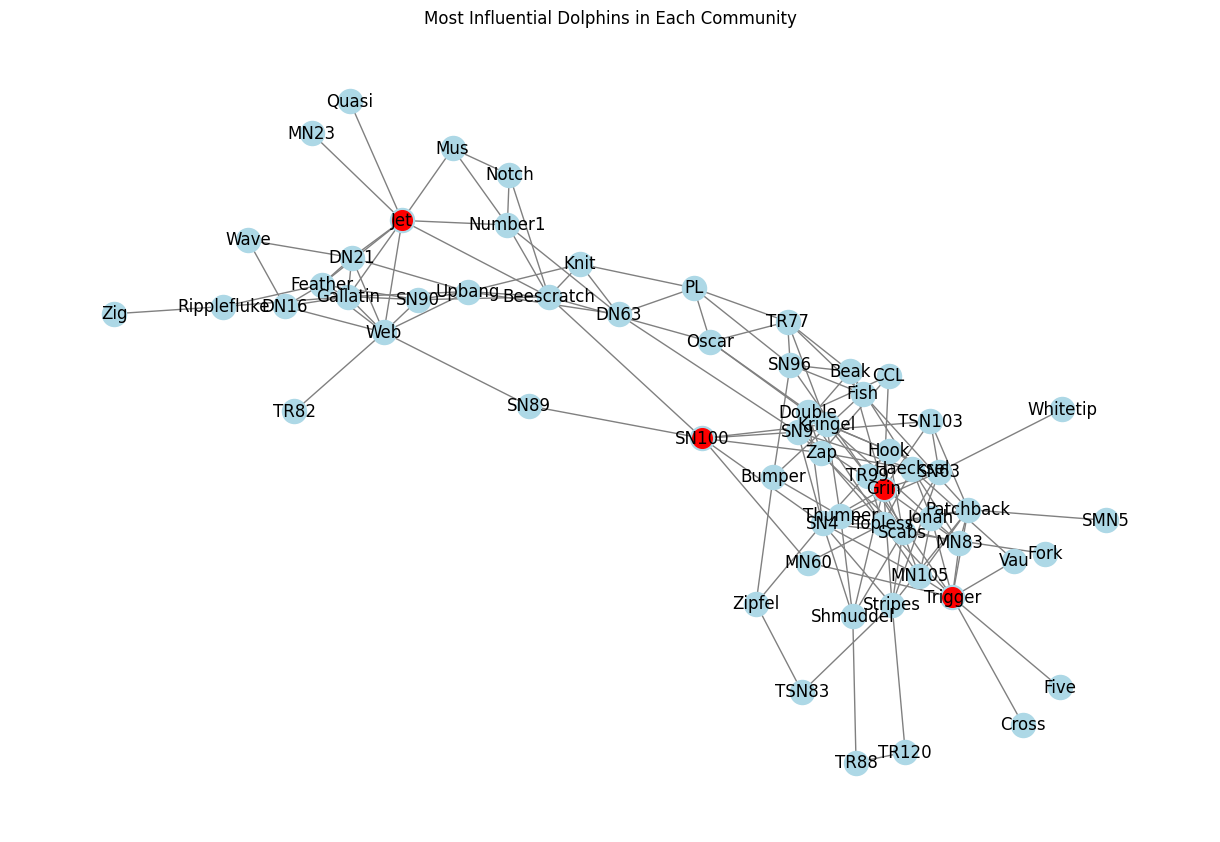

In [38]:
plt.figure(figsize=(12, 8))

# Drawing the entire network
nx.draw(dolphin_network, pos, node_color='lightblue', edge_color='gray', with_labels=True)

# Highlighting the most influential dolphins in each community
for community in communities:
    most_influential = most_influential_in_community(dolphin_network, community)
    nx.draw_networkx_nodes(dolphin_network, pos, nodelist=[most_influential], node_color='red', node_size=200)

plt.title("Most Influential Dolphins in Each Community")
plt.show()

## Clique Detection

This part is modified from github code.

Might NOT be useful based on my understanding...
You can try to interpret the result...

In [24]:
maximal_cliques = list(clique.find_cliques(dolphin_network))
# Finding the size of the largest clique(s)
largest_clique_size = max(len(clique) for clique in maximal_cliques)
# Filtering for the largest cliques
largest_cliques = [clique for clique in maximal_cliques if len(clique) == largest_clique_size]
print(largest_cliques)

[['Jet', 'Feather', 'Gallatin', 'DN21', 'Web'], ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN83'], ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN105']]


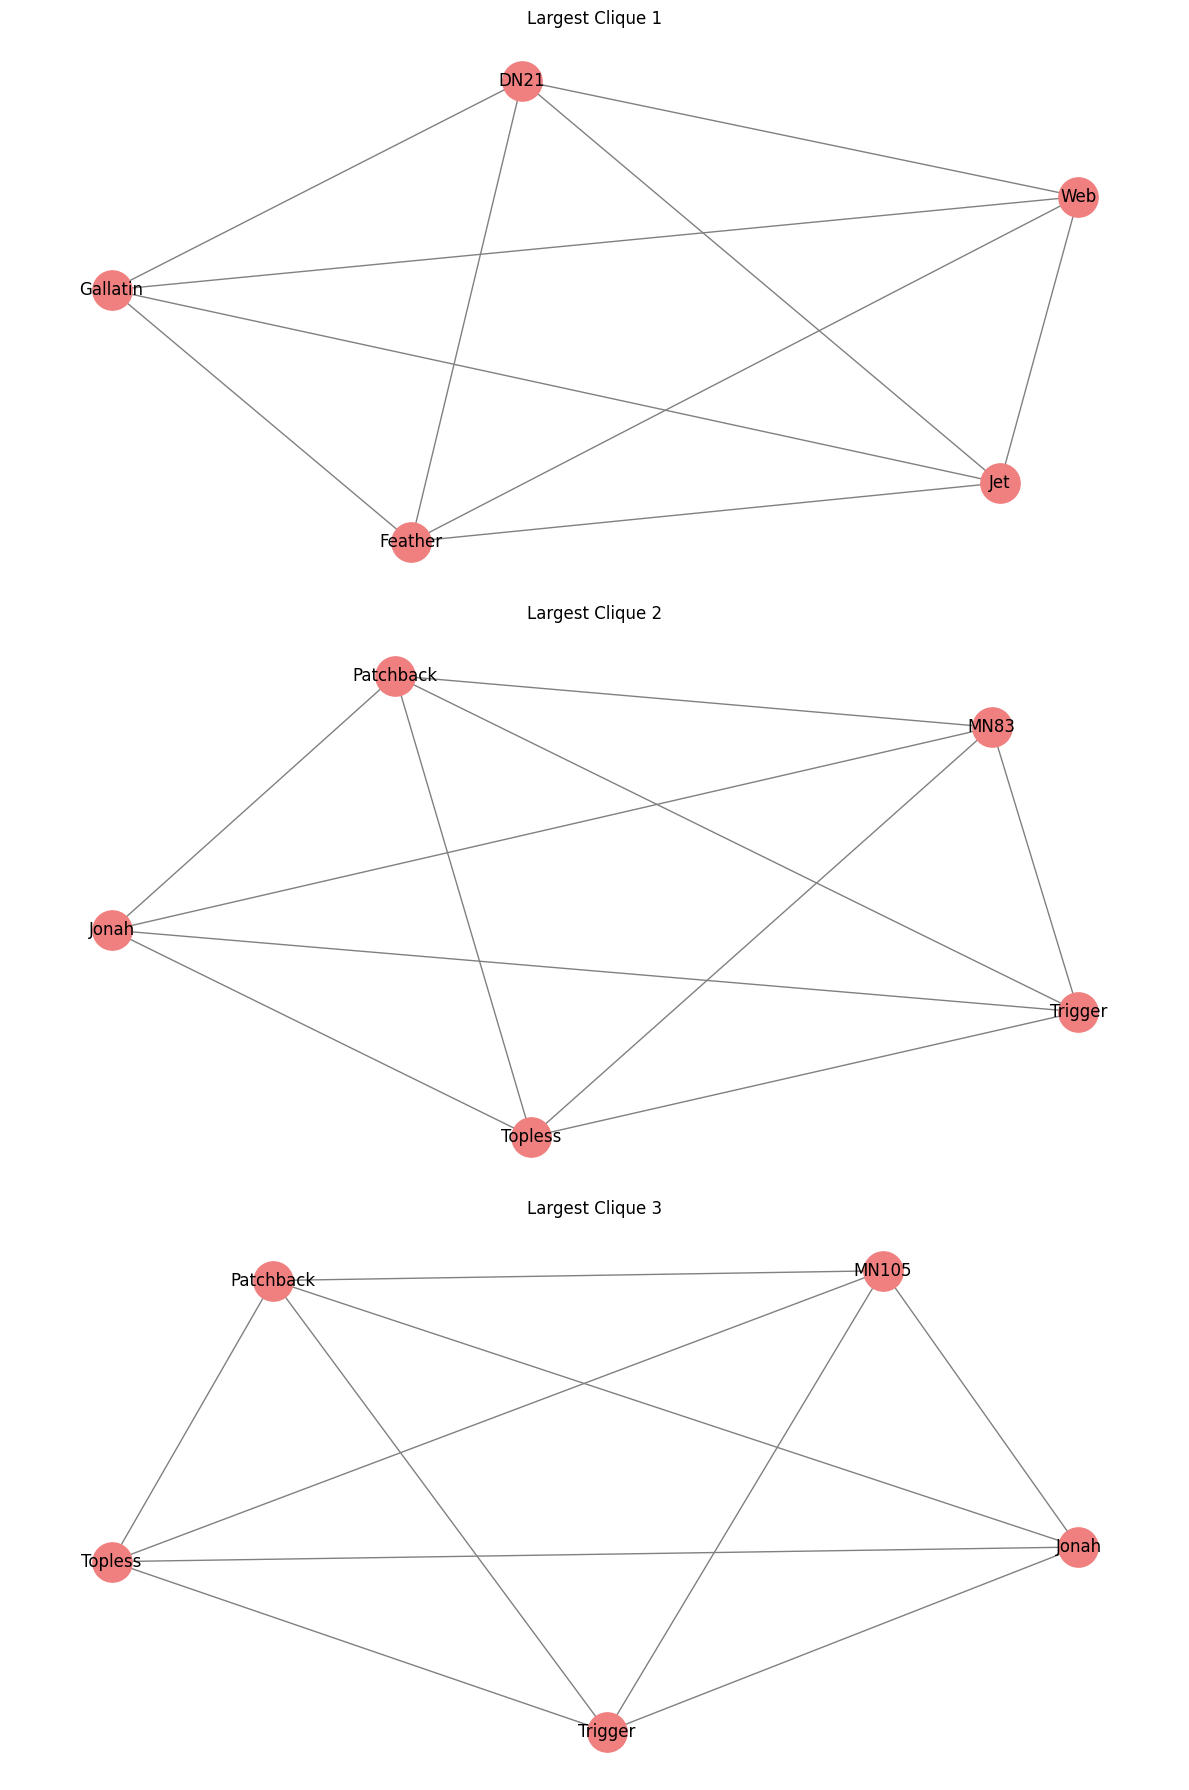

In [37]:
fig, axes = plt.subplots(len(largest_cliques), 1, figsize=(12, len(largest_cliques) * 6))

for i, clique in enumerate(largest_cliques):
    # Creating a subgraph for each clique
    clique_graph = dolphin_network.subgraph(clique)

    # Drawing the subgraph
    nx.draw(clique_graph,
            ax=axes[i],
            with_labels=True,
            node_color='lightcoral',
            node_size=800,
            edge_color='gray')

    axes[i].set_title(f"Largest Clique {i+1}")

plt.tight_layout()
plt.show()

Largest Clique 1: Includes 'DN21', 'Gallatin', 'Web', 'Jet', 'Feather'.


Largest Clique 2: Comprises 'Trigger', 'Topless', 'Jonah', 'Patchback', 'MN105'.


Largest Clique 3: Consists of 'Trigger', 'Topless', 'Jonah', 'Patchback', 'MN83'.

## Potential Topic for Future Analysis

### Those methods are related to the class material. Feel free to generate more applicable questions.

### Be careful, some of the code are directly modify from our lab and homeworks.

TODO: DOUBLE CHECK IT CAN DIRECTLY APPLY TO OUR PROBLEM!!!

## Does the dolphin social network exhibit small-world characteristics? (Small-World network)

In [45]:
# Calculate the average clustering coefficient
clustering_coefficient = nx.average_clustering(dolphin_network)

# Calculate the average shortest path length if the network is connected
if nx.is_connected(dolphin_network):
    average_shortest_path_length = nx.average_shortest_path_length(dolphin_network)

print("Average Clustering Coefficient:", clustering_coefficient)
print("Average Shortest Path Length:", average_shortest_path_length)

Average Clustering Coefficient: 0.2589582460550202
Average Shortest Path Length: 3.3569539925965097


## How might information potentially flow within the dolphin network? (Random Walk)



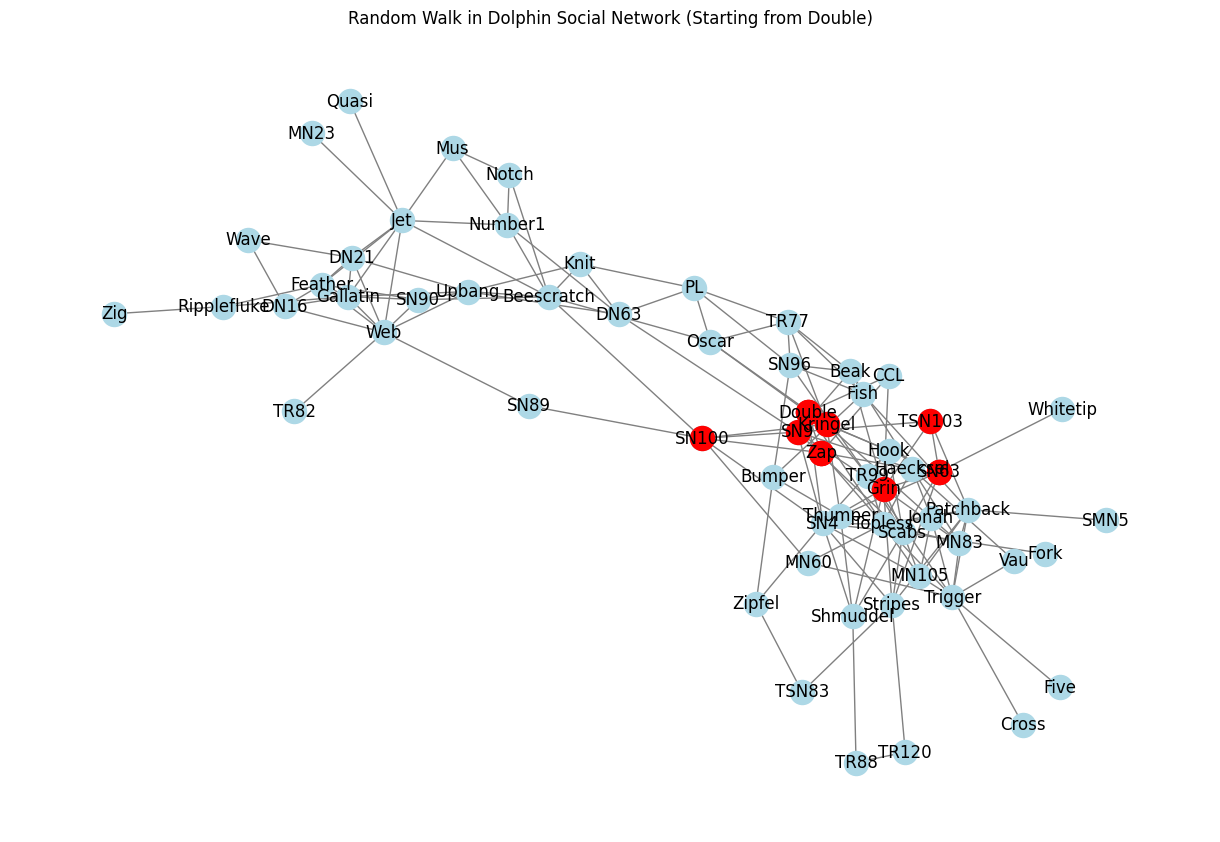

In [35]:
def perform_random_walk(G, start_node, steps=15): # steps=10
    path = [start_node]
    for _ in range(steps):
        current_node = path[-1]
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        path.append(next_node)
    return path


random.seed(608)
start_node = random.choice(list(dolphin_network.nodes))

random_walk_path = perform_random_walk(dolphin_network, start_node, steps=10)

# Visualization
pos = nx.spring_layout(dolphin_network)
plt.figure(figsize=(12, 8))
nx.draw(dolphin_network, pos, node_color='lightblue', edge_color='gray', with_labels=True)
nx.draw_networkx_nodes(dolphin_network, pos, nodelist=random_walk_path, node_color='red')
plt.title(f"Random Walk in Dolphin Social Network (Starting from {start_node})")
plt.show()

## How information might propagate through the network, starting from influential dolphins (Influence Spread Simulation)

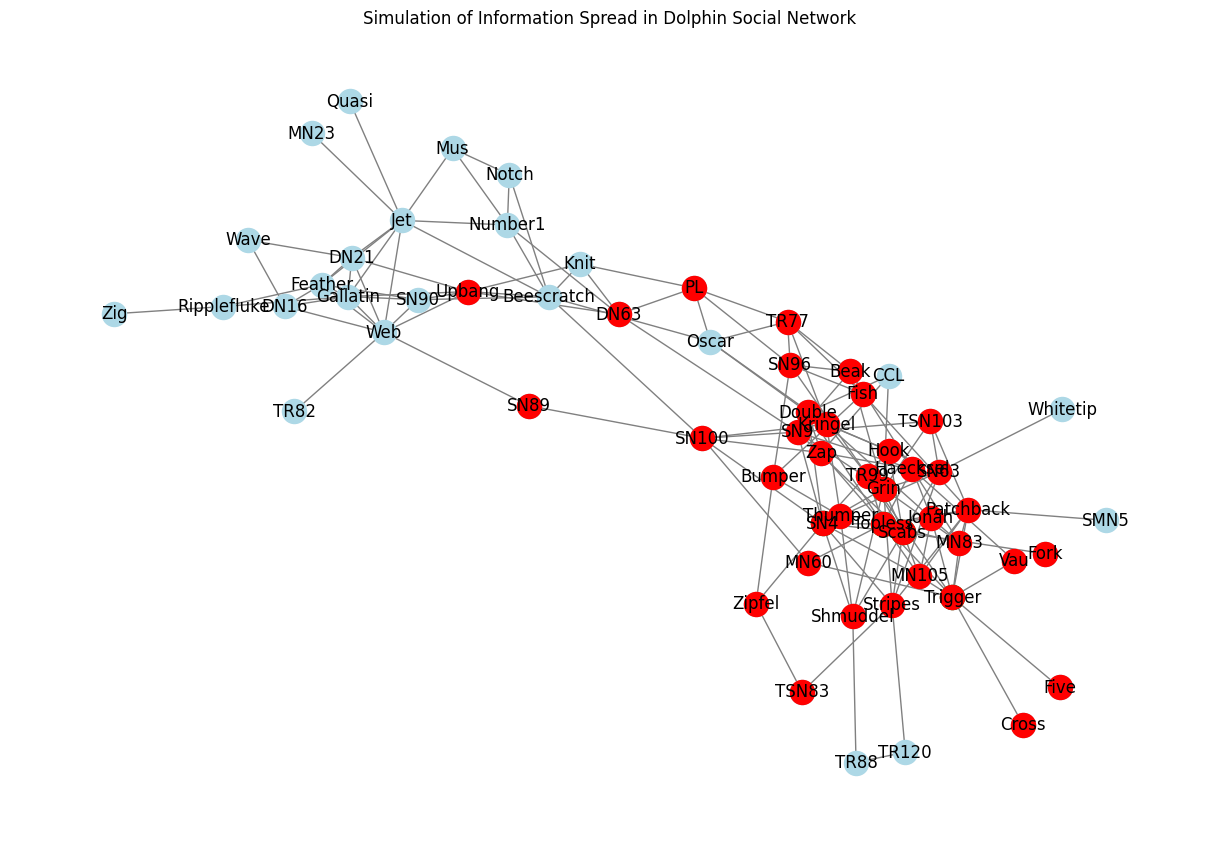

[('Grin', 0.19672131147540983),
 ('SN4', 0.18032786885245902),
 ('Topless', 0.18032786885245902),
 ('Scabs', 0.1639344262295082),
 ('Trigger', 0.1639344262295082)]

In [39]:
# Identifying key influential dolphins based on centrality measures
degree_central_nodes = sorted(nx.degree_centrality(dolphin_network).items(), key=lambda x: x[1], reverse=True)[:5]

# Independent Cascade model
def independent_cascade(G, initial_nodes, steps=3):
    active = set(initial_nodes)
    newly_active = set(initial_nodes)

    for _ in range(steps):
        current_newly_active = set()
        for node in newly_active:
            neighbors = set(G.neighbors(node)) - active
            for neighbor in neighbors:
                if random.random() < 0.5:
                    current_newly_active.add(neighbor)
                    active.add(neighbor)
        newly_active = current_newly_active

    return active

# Starting the process with the top 5 degree central nodes
initial_nodes = [node for node, _ in degree_central_nodes]
spread_nodes = independent_cascade(dolphin_network, initial_nodes)

# Visualization of the spread of influence
plt.figure(figsize=(12, 8))
nx.draw(dolphin_network, pos, node_color='lightblue', edge_color='gray', with_labels=True)
nx.draw_networkx_nodes(dolphin_network, pos, nodelist=initial_nodes, node_color='green')
nx.draw_networkx_nodes(dolphin_network, pos, nodelist=spread_nodes, node_color='red')
plt.title("Simulation of Information Spread in Dolphin Social Network")
plt.show()

degree_central_nodes



## How does the removal of the most influential dolphins affect the overall structure of the network? (Network Robustness)

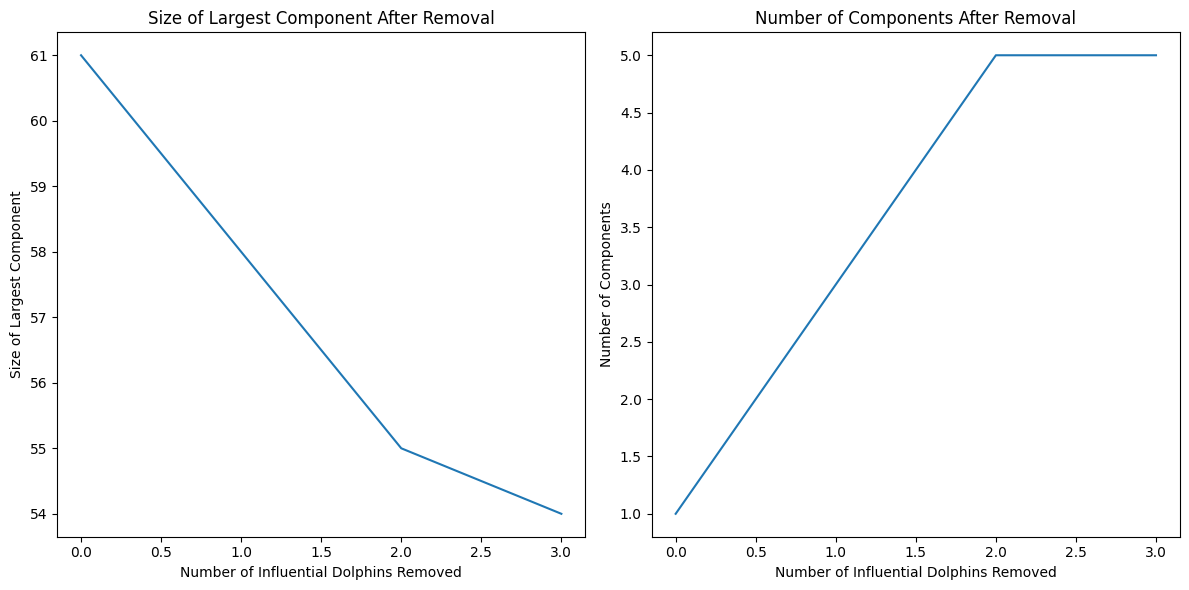

In [43]:
most_influential_in_each_community = [most_influential_in_community(dolphin_network, community) for community in communities]

# Make a copy of the original network for analysis
network_copy = dolphin_network.copy()

# Analysis results storage
largest_component_size_after_removal = []
number_of_components_after_removal = []

# Iteratively remove the most influential dolphins from each community
for node in most_influential_in_each_community:
    network_copy.remove_node(node)
    components = list(nx.connected_components(network_copy))
    largest_component_size_after_removal.append(len(max(components, key=len)))
    number_of_components_after_removal.append(len(components))

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the size of the largest component
plt.subplot(1, 2, 1)
plt.plot(largest_component_size_after_removal)
plt.title("Size of Largest Component After Removal")
plt.xlabel("Number of Influential Dolphins Removed")
plt.ylabel("Size of Largest Component")

# Plotting the number of components
plt.subplot(1, 2, 2)
plt.plot(number_of_components_after_removal)
plt.title("Number of Components After Removal")
plt.xlabel("Number of Influential Dolphins Removed")
plt.ylabel("Number of Components")

plt.tight_layout()
plt.show()